In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [2]:
# Download training dataset
dataset = MNIST(root='data/', download=True)

Processing...
Done!


In [4]:
len(dataset)

60000

In [5]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [9]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x2BE703E1198>, tensor(5))

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: tensor(5)


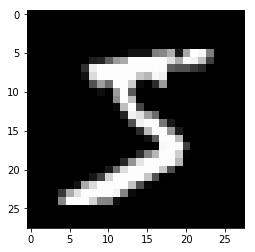

In [10]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)

Label: tensor(3)


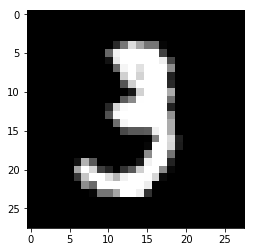

In [11]:
image, label = dataset[10]
plt.imshow(image, cmap='gray')
print('Label:', label)

In [12]:
import torchvision.transforms as transforms

In [13]:
dataset = MNIST(root='data/', 
                train=True,
                transform=transforms.ToTensor())

In [14]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) tensor(5)


In [15]:
print(img_tensor[:,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


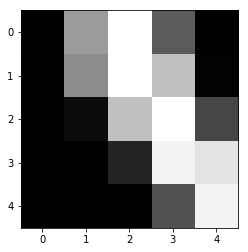

In [16]:
# Plot the image by passing in the 28x28 matrix
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray');

In [17]:
import numpy as np

def split_indices(n, val_pct):
    # Determine size of validation set
    n_val = int(val_pct*n)
    # Create random permutation of 0 to n-1
    idxs = np.random.permutation(n)
    # Pick first n_val indices for validation set
    return idxs[n_val:], idxs[:n_val]

In [18]:
train_indices, val_indices = split_indices(len(dataset), val_pct=0.2)

In [19]:
print(len(train_indices), len(val_indices))
print('Sample val indices: ', val_indices[:20])

48000 12000
Sample val indices:  [35737 43507 43562 18919 27836  9525 45631  2750  1752 37052 42865 28789
 18737 46527 49908 45460 25463 51197 39822 11393]


In [20]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [21]:
batch_size=100

# Training sampler and data loader
train_sampler = SubsetRandomSampler(train_indices)
train_loader = DataLoader(dataset, 
                          batch_size, 
                          sampler=train_sampler)

# Validation sampler and data loader
val_sampler = SubsetRandomSampler(val_indices)
val_loader = DataLoader(dataset,
                        batch_size, 
                        sampler=val_sampler)

In [29]:
!pip install jovian --upgrade

Requirement already up-to-date: jovian in c:\users\yashh\anaconda3\lib\site-packages (0.2.6)


In [30]:
import jovian

<IPython.core.display.Javascript object>

In [31]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Please enter your API key ( from https://jovian.ml/ ):
API KEY: ········
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/yashhshah16/logistic-regression


In [22]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [23]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[-8.1718e-03, -4.2995e-03,  6.0313e-03,  ...,  1.7119e-02,
          2.7363e-02,  5.5042e-03],
        [ 3.3522e-03,  3.1915e-02, -6.4085e-03,  ..., -2.1026e-02,
          5.4616e-05, -1.3706e-02],
        [-3.2273e-02, -2.8122e-02, -7.4421e-03,  ...,  3.3081e-02,
          1.3554e-03, -2.1532e-02],
        ...,
        [ 1.1805e-02,  3.4517e-02, -1.3686e-02,  ..., -2.8655e-02,
         -3.5424e-02, -2.6804e-02],
        [ 7.0070e-03,  4.9294e-03, -2.7620e-02,  ..., -7.4096e-03,
          1.9593e-02,  3.5441e-02],
        [-5.3411e-04, -2.7536e-02,  2.7125e-02,  ..., -2.2661e-02,
         -3.0166e-02,  1.5945e-02]], requires_grad=True)

In [24]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([-3.1686e-02,  1.4083e-02,  2.6280e-02,  1.7142e-02, -2.8214e-02,
         2.6763e-02,  1.6600e-02,  4.7024e-05, -1.7010e-02, -2.6800e-02],
       requires_grad=True)

In [25]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    break

tensor([4, 2, 8, 7, 0, 6, 1, 4, 3, 3, 1, 7, 6, 8, 9, 0, 2, 8, 1, 3, 5, 9, 7, 1,
        4, 2, 2, 4, 9, 8, 7, 1, 4, 6, 5, 6, 0, 2, 9, 1, 1, 5, 9, 3, 2, 6, 9, 9,
        6, 2, 2, 9, 8, 8, 4, 7, 5, 3, 0, 8, 0, 3, 0, 5, 9, 9, 1, 7, 1, 4, 2, 5,
        6, 4, 4, 5, 2, 8, 5, 0, 1, 0, 7, 0, 4, 9, 3, 3, 0, 6, 3, 2, 9, 6, 4, 6,
        5, 9, 3, 8])
torch.Size([100, 1, 28, 28])


RuntimeError: size mismatch, m1: [2800 x 28], m2: [784 x 10] at c:\n\pytorch_1559129895673\work\aten\src\th\generic/THTensorMath.cpp:940

In [26]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

In [27]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0093,  0.0164,  0.0320,  ..., -0.0029,  0.0259, -0.0269],
         [-0.0251,  0.0127,  0.0165,  ...,  0.0320, -0.0041,  0.0021],
         [-0.0004, -0.0211, -0.0020,  ..., -0.0137,  0.0128, -0.0345],
         ...,
         [ 0.0044, -0.0329,  0.0099,  ..., -0.0343,  0.0162,  0.0344],
         [-0.0275,  0.0180, -0.0009,  ..., -0.0163,  0.0277,  0.0106],
         [-0.0170,  0.0208,  0.0302,  ...,  0.0087,  0.0159, -0.0055]],
        requires_grad=True), Parameter containing:
 tensor([ 0.0278, -0.0179, -0.0298,  0.0191, -0.0070,  0.0112, -0.0158,  0.0041,
         -0.0126,  0.0009], requires_grad=True)]

In [28]:
for images, labels in train_loader:
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

outputs.shape :  torch.Size([100, 10])
Sample outputs :
 tensor([[-0.0441,  0.0349,  0.2022,  0.1462, -0.1001,  0.2006, -0.0442, -0.2110,
         -0.0898, -0.1950],
        [ 0.1387, -0.2094,  0.2722,  0.0502, -0.5408,  0.0507, -0.1128, -0.1643,
          0.1299,  0.0037]])


In [32]:
import torch.nn.functional as F

In [33]:
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.0956, 0.1035, 0.1224, 0.1157, 0.0904, 0.1222, 0.0956, 0.0809, 0.0914,
         0.0822],
        [0.1167, 0.0824, 0.1334, 0.1068, 0.0592, 0.1069, 0.0908, 0.0862, 0.1157,
         0.1020]])
Sum:  1.0


In [34]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([2, 2, 5, 9, 5, 2, 5, 0, 5, 8, 0, 2, 5, 3, 9, 1, 6, 5, 8, 9, 5, 8, 2, 0,
        9, 8, 1, 2, 8, 5, 0, 0, 6, 5, 3, 8, 3, 3, 5, 3, 9, 1, 3, 1, 1, 8, 5, 0,
        9, 5, 3, 8, 8, 8, 6, 0, 9, 8, 1, 5, 2, 0, 1, 3, 8, 9, 2, 9, 0, 2, 9, 2,
        1, 3, 0, 2, 8, 3, 5, 2, 8, 2, 2, 3, 3, 8, 5, 1, 2, 5, 2, 3, 0, 3, 3, 2,
        9, 0, 4, 2])
tensor([0.1224, 0.1334, 0.1222, 0.1303, 0.1522, 0.1189, 0.1222, 0.1226, 0.1337,
        0.1294, 0.1275, 0.1217, 0.1374, 0.1339, 0.1414, 0.1435, 0.1248, 0.1417,
        0.1204, 0.1320, 0.1168, 0.1401, 0.1308, 0.1326, 0.1303, 0.1239, 0.1165,
        0.1174, 0.1221, 0.1384, 0.1327, 0.1134, 0.1265, 0.1261, 0.1272, 0.1284,
        0.1429, 0.1650, 0.1197, 0.1282, 0.1321, 0.1311, 0.1445, 0.1377, 0.1341,
        0.1317, 0.1227, 0.1378, 0.1246, 0.1252, 0.1213, 0.1176, 0.1243, 0.1316,
        0.1365, 0.1250, 0.1538, 0.1600, 0.1369, 0.1318, 0.1319, 0.1222, 0.1437,
        0.1424, 0.1316, 0.1327, 0.1298, 0.1288, 0.1269, 0.1162, 0.1112, 0.1472,
        0.1141, 0.1

In [35]:
labels

tensor([4, 0, 2, 6, 6, 7, 1, 5, 3, 1, 3, 7, 7, 0, 2, 8, 7, 5, 1, 8, 1, 9, 5, 3,
        6, 3, 8, 7, 3, 9, 3, 1, 7, 0, 9, 6, 8, 8, 4, 4, 4, 3, 4, 3, 2, 9, 8, 5,
        2, 1, 9, 6, 1, 3, 7, 5, 6, 0, 8, 1, 4, 3, 4, 8, 3, 6, 9, 1, 5, 9, 0, 0,
        8, 4, 3, 0, 1, 5, 7, 7, 3, 7, 9, 5, 0, 0, 0, 4, 4, 7, 2, 6, 8, 3, 6, 7,
        4, 3, 7, 7])

In [36]:
def accuracy(l1, l2):
    return torch.sum(l1 == l2).item() / len(l1)

In [37]:
accuracy(preds, labels)

0.03

In [39]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "yashhshah16/logistic-regression" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/yashhshah16/logistic-regression


In [40]:
loss_fn = F.cross_entropy

In [41]:
# Loss for current batch of data
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3588, grad_fn=<NllLossBackward>)


In [42]:
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [43]:
def loss_batch(model, loss_func, xb, yb, opt=None, metric=None):
    # Calculate loss
    preds = model(xb)
    loss = loss_func(preds, yb)
                     
    if opt is not None:
        # Compute gradients
        loss.backward()
        # Update parameters             
        opt.step()
        # Reset gradients
        opt.zero_grad()
    
    metric_result = None
    if metric is not None:
        # Compute the metric
        metric_result = metric(preds, yb)
    
    return loss.item(), len(xb), metric_result

In [44]:
def evaluate(model, loss_fn, valid_dl, metric=None):
    with torch.no_grad():
        # Pass each batch through the model
        results = [loss_batch(model, loss_fn, xb, yb, metric=metric)
                   for xb,yb in valid_dl]
        # Separate losses, counts and metrics
        losses, nums, metrics = zip(*results)
        # Total size of the dataset
        total = np.sum(nums)
        # Avg. loss across batches 
        avg_loss = np.sum(np.multiply(losses, nums)) / total
        avg_metric = None
        if metric is not None:
            # Avg. of metric across batches
            avg_metric = np.sum(np.multiply(metrics, nums)) / total
    return avg_loss, total, avg_metric

In [45]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.sum(preds == labels).item() / len(preds)

In [46]:
val_loss, total, val_acc = evaluate(model, loss_fn, val_loader, metric=accuracy)
print('Loss: {:.4f}, Accuracy: {:.4f}'.format(val_loss, val_acc))

Loss: 2.3405, Accuracy: 0.0857


In [47]:
def fit(epochs, model, loss_fn, opt, train_dl, valid_dl, metric=None):
    for epoch in range(epochs):
        # Training
        for xb,yb in train_dl:
            loss,_,_ = loss_batch(model, loss_fn, xb, yb, opt)

        # Evaluation
        result = evaluate(model, loss_fn, valid_dl, metric)
        val_loss, total, val_metric = result
        
        # Print progress
        if metric is None:
            print('Epoch [{}/{}], Loss: {:.4f}'
                  .format(epoch+1, epochs, val_loss))
        else:
            print('Epoch [{}/{}], Loss: {:.4f}, {}: {:.4f}'
                  .format(epoch+1, epochs, val_loss, metric.__name__, val_metric))

In [48]:
model = MnistModel()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [49]:
fit(5, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

Epoch [1/5], Loss: 1.8812, accuracy: 0.6661
Epoch [2/5], Loss: 1.5805, accuracy: 0.7468
Epoch [3/5], Loss: 1.3700, accuracy: 0.7758
Epoch [4/5], Loss: 1.2191, accuracy: 0.7941
Epoch [5/5], Loss: 1.1074, accuracy: 0.8054


In [50]:
fit(5, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

Epoch [1/5], Loss: 1.0219, accuracy: 0.8135
Epoch [2/5], Loss: 0.9546, accuracy: 0.8202
Epoch [3/5], Loss: 0.9003, accuracy: 0.8269
Epoch [4/5], Loss: 0.8555, accuracy: 0.8319
Epoch [5/5], Loss: 0.8179, accuracy: 0.8356


In [51]:
fit(5, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

Epoch [1/5], Loss: 0.7858, accuracy: 0.8392
Epoch [2/5], Loss: 0.7581, accuracy: 0.8420
Epoch [3/5], Loss: 0.7339, accuracy: 0.8446
Epoch [4/5], Loss: 0.7126, accuracy: 0.8467
Epoch [5/5], Loss: 0.6936, accuracy: 0.8492


In [52]:
fit(5, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

Epoch [1/5], Loss: 0.6766, accuracy: 0.8509
Epoch [2/5], Loss: 0.6612, accuracy: 0.8528
Epoch [3/5], Loss: 0.6473, accuracy: 0.8547
Epoch [4/5], Loss: 0.6346, accuracy: 0.8557
Epoch [5/5], Loss: 0.6230, accuracy: 0.8572


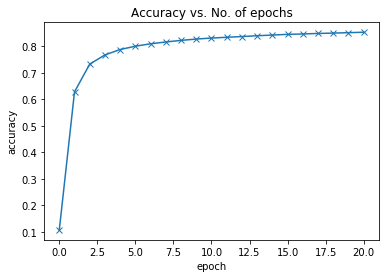

In [53]:
# Replace these values with your results
accuracies = [0.1076, 0.6282, 0.7329, 0.7675, 0.7879, 0.8003,
              0.8095, 0.8163, 0.8223, 0.8273, 0.8311, 
              0.8340, 0.8367, 0.8398, 0.8424, 0.8450,
              0.8465, 0.8484, 0.8498, 0.8514, 0.8530]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');